<a href="https://colab.research.google.com/github/williamokomba/Exploratory-Data-Analysis-in-python/blob/main/Exploratory_Data_Analysis_in_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### practice on 20th May 2021

In [15]:
#importing the desired libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [30]:
#steps in EDA
'''
Description of the data
Handling of the missing data
Handling of outliers
Understanding the relationhips and insights through plots
'''

In [16]:
#loading the dataset
data = sns.load_dataset("/content/titanic")
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [18]:
#checking the shape
data.shape

(891, 15)

In [19]:
# consice summary
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [20]:
#checking datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [23]:
#identifying which column has missing values
data.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [26]:
#Getting the records where missing values are there in deck column
data[data["deck"].isna()]  # you can use isna or isnull

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False


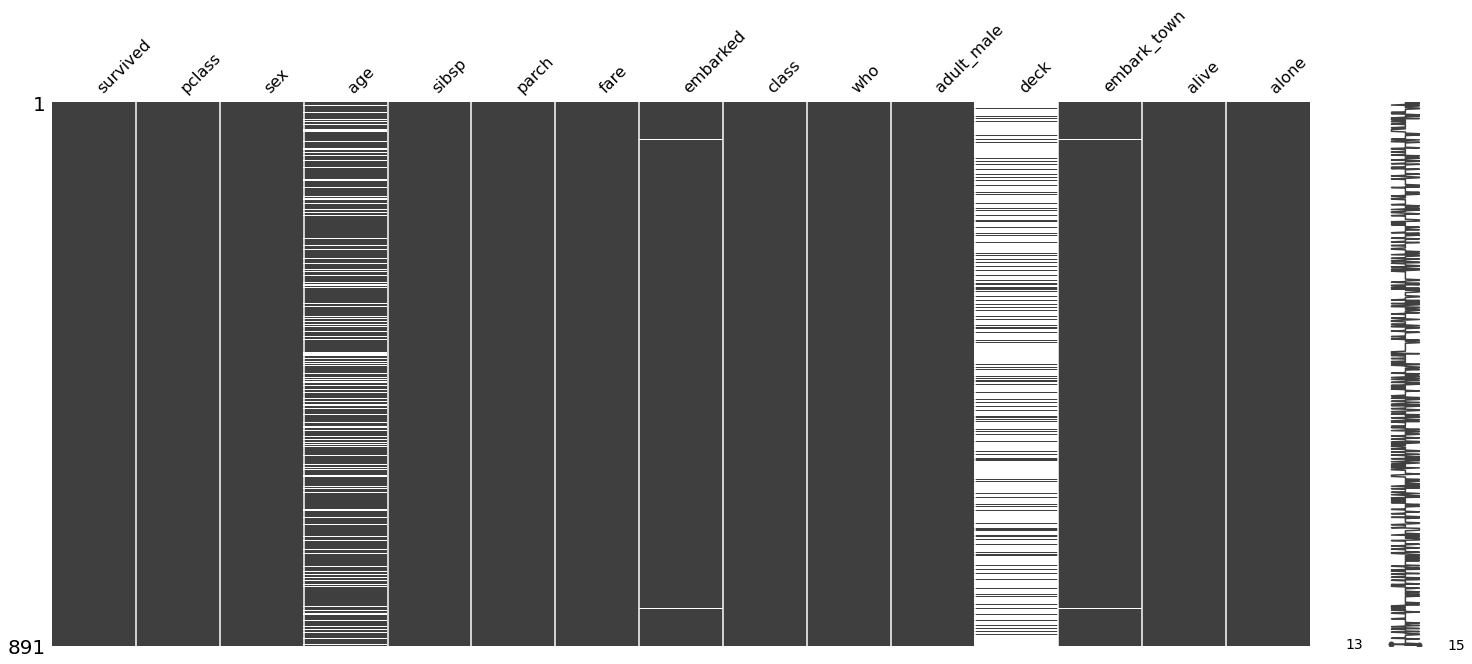

In [28]:
#Alternative way to detect missing values
import missingno as an
an.matrix(data)
plt.show()

**Observation**: age, embarked, deck,and embarked_town colunms has missing values

In [45]:
# checking the datatype
data["deck"].unique()
#this is categorical datatype, thus we can use the mode to compute the missing values

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F'], dtype=object)

In [46]:
#checking the mode
data["deck"].mode()
# c is the mode

0    C
dtype: object

In [47]:
#checking the number of frequences
data["deck"].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

### Computing the misssing values

In [51]:
# we create the copy of the dataframe first
data_df = data.copy()
data_df["deck"].mode()[0]

'C'

In [52]:
#filling the missing value with the mode
data_df["deck"].fillna(data_df.deck.mode()[0], inplace=True)

In [55]:
#confirming the changes
data_df[data_df["deck"].isnull()]
## no more missing values in deck column.

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone


In [58]:
#checking the age colunm
data_df[data_df["age"].isna()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,C,Queenstown,no,True
17,1,2,male,NaN,0,0,13.0000,S,Second,man,True,C,Southampton,yes,True
19,1,3,female,NaN,0,0,7.2250,C,Third,woman,False,C,Cherbourg,yes,True
26,0,3,male,NaN,0,0,7.2250,C,Third,man,True,C,Cherbourg,no,True
28,1,3,female,NaN,0,0,7.8792,Q,Third,woman,False,C,Queenstown,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C,Third,man,True,C,Cherbourg,no,True
863,0,3,female,NaN,8,2,69.5500,S,Third,woman,False,C,Southampton,no,False
868,0,3,male,NaN,0,0,9.5000,S,Third,man,True,C,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,C,Southampton,no,True


In [69]:
#checking the unique value#
print("unique value", "\n" , data_df.age.unique())
print(data_df["age"].())


unique value 
 [22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]
24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: age, Length: 88, dtype: int64


In [71]:
#filling the missing value with the mode
data_df["age"].fillna(data_df.age.mode()[0], inplace=True)
data_df["age"].isna().sum()

0

### Dealing with outliers

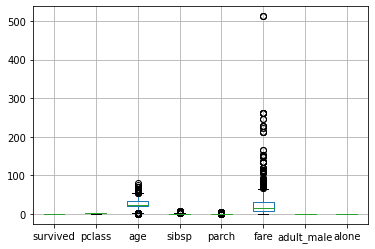

In [72]:
#Dealing with outlier
data_df.boxplot()
# age, sibsp, parch, and fare have outliers

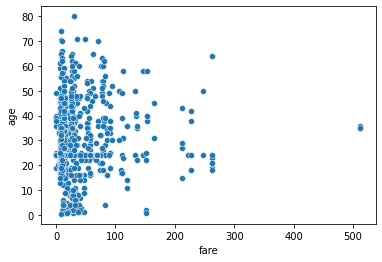

In [73]:
#we can check outliers with scatterplots as well, though boxplot is much better
sns.scatterplot(data=data_df, x= "fare", y = "age")

In [82]:
#computing the IQR
q1 = data_df["fare"].quantile(0.25)
q3 = data_df["fare"].quantile(0.75)
iqr = q3-q1
print("q1 :" ,q1, "\n", "q3 :" ,q3, "\n","iqr :", iqr)

q1 : 7.9104 
 q3 : 31.0 
 iqr : 23.0896


In [84]:
data_df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,28.566970,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.199572,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [86]:
#Removing outliers
lower_outlier = data_df["fare"]< (q1-1.5*iqr)
upper_outlier = data_df["fare"] > (q3+1.5*iqr)
data_df[lower_outlier|upper_outlier] # this shows data_df with outliers

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False
31,1,1,female,24.0,1,0,146.5208,C,First,woman,False,B,Cherbourg,yes,False
34,0,1,male,28.0,1,0,82.1708,C,First,man,True,C,Cherbourg,no,False
52,1,1,female,49.0,1,0,76.7292,C,First,woman,False,D,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846,0,3,male,24.0,8,2,69.5500,S,Third,man,True,C,Southampton,no,False
849,1,1,female,24.0,1,0,89.1042,C,First,woman,False,C,Cherbourg,yes,False
856,1,1,female,45.0,1,1,164.8667,S,First,woman,False,C,Southampton,yes,False
863,0,3,female,24.0,8,2,69.5500,S,Third,woman,False,C,Southampton,no,False


In [89]:
#checking median
data_df["fare"].median()

14.4542

In [95]:
# checking data_df without outliers
data_clean = data_df[~(lower_outlier|upper_outlier)]
data_clean

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,no,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,C,Southampton,no,True
5,0,3,male,24.0,0,0,8.4583,Q,Third,man,True,C,Queenstown,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,C,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,24.0,1,2,23.4500,S,Third,woman,False,C,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


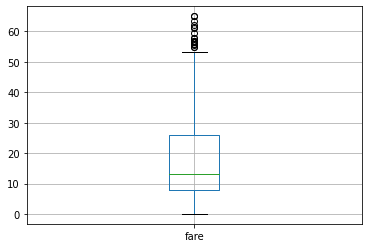

In [96]:
#checking the outliers 
data_clean.boxplot(column="fare")
# outlier hs drastically reduced. 

In [102]:
#median without outliers
data_clean.fare.median()
#median has reduced as well.

13.0

In [103]:
# mean with and without outliers
print(data_df.fare.mean()) #with outlier
print(data_clean["fare"].mean()) # without outliers


32.2042079685746
17.822090709677408


### understanding r/ship and insights through data

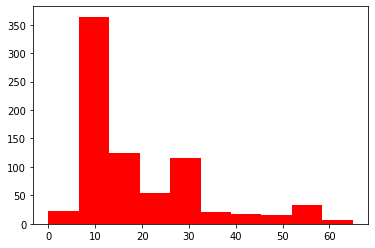

In [134]:
#fare histogram 
plt.plot(figsize= (10,30))
plt.hist(data_clean.fare, bins= 10, color= "r")
plt.show()

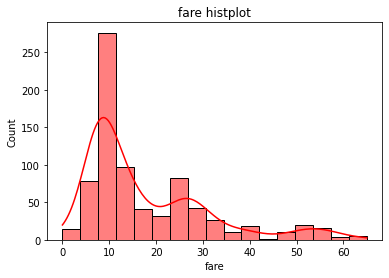

In [133]:
# checking histoplot for skewness
plt.plot(figsize= (10,30))
sns.histplot(data_clean, x = "fare", bins="auto", kde= True, color= "r")
plt.title("fare histplot")
plt.show()